In [1]:
# Import pandas for reading CSV files
import pandas as pd
import os

# Load all CSV files from the data folder
data_folder = 'data'

# Read each CSV file
aisles = pd.read_csv(os.path.join(data_folder, 'aisles.csv'))
departments = pd.read_csv(os.path.join(data_folder, 'departments.csv'))
order_products_prior = pd.read_csv(os.path.join(data_folder, 'order_products__prior.csv'))
order_products_train = pd.read_csv(os.path.join(data_folder, 'order_products__train.csv'))
orders = pd.read_csv(os.path.join(data_folder, 'orders.csv'))
products = pd.read_csv(os.path.join(data_folder, 'products.csv'))

# Display basic information about each dataset
print("Dataset shapes:")
print(f"aisles: {aisles.shape}")
print(f"departments: {departments.shape}")
print(f"order_products_prior: {order_products_prior.shape}")
print(f"order_products_train: {order_products_train.shape}")
print(f"orders: {orders.shape}")
print(f"products: {products.shape}")

print("\nDatasets loaded successfully!")

Dataset shapes:
aisles: (134, 2)
departments: (21, 2)
order_products_prior: (32434489, 4)
order_products_train: (1384617, 4)
orders: (3421083, 7)
products: (49688, 4)

Datasets loaded successfully!


In [2]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import networkx as nx

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Visualization libraries loaded successfully!")
print("\nFirst, let's examine the structure of each dataset:")

# Display first few rows and info about each dataset
datasets = {
    'orders': orders,
    'products': products,
    'aisles': aisles,
    'departments': departments,
    'order_products_train': order_products_train,
    'order_products_prior': order_products_prior
}

for name, df in datasets.items():
    print(f"\n{name.upper()} - Shape: {df.shape}")
    print("Columns:", list(df.columns))
    print("Sample data:")
    print(df.head(3))
    print("-" * 50)

Visualization libraries loaded successfully!

First, let's examine the structure of each dataset:

ORDERS - Shape: (3421083, 7)
Columns: ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
Sample data:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
--------------------------------------------------

PRODUCTS - Shape: (49688, 4)
Columns: ['product_id', 'product_name', 'aisle_id', 'department_id']
Sample data:
   product_id                          product_name  aisle_id  department_id
0           1            Chocolate Sandwich Cookies        61             19


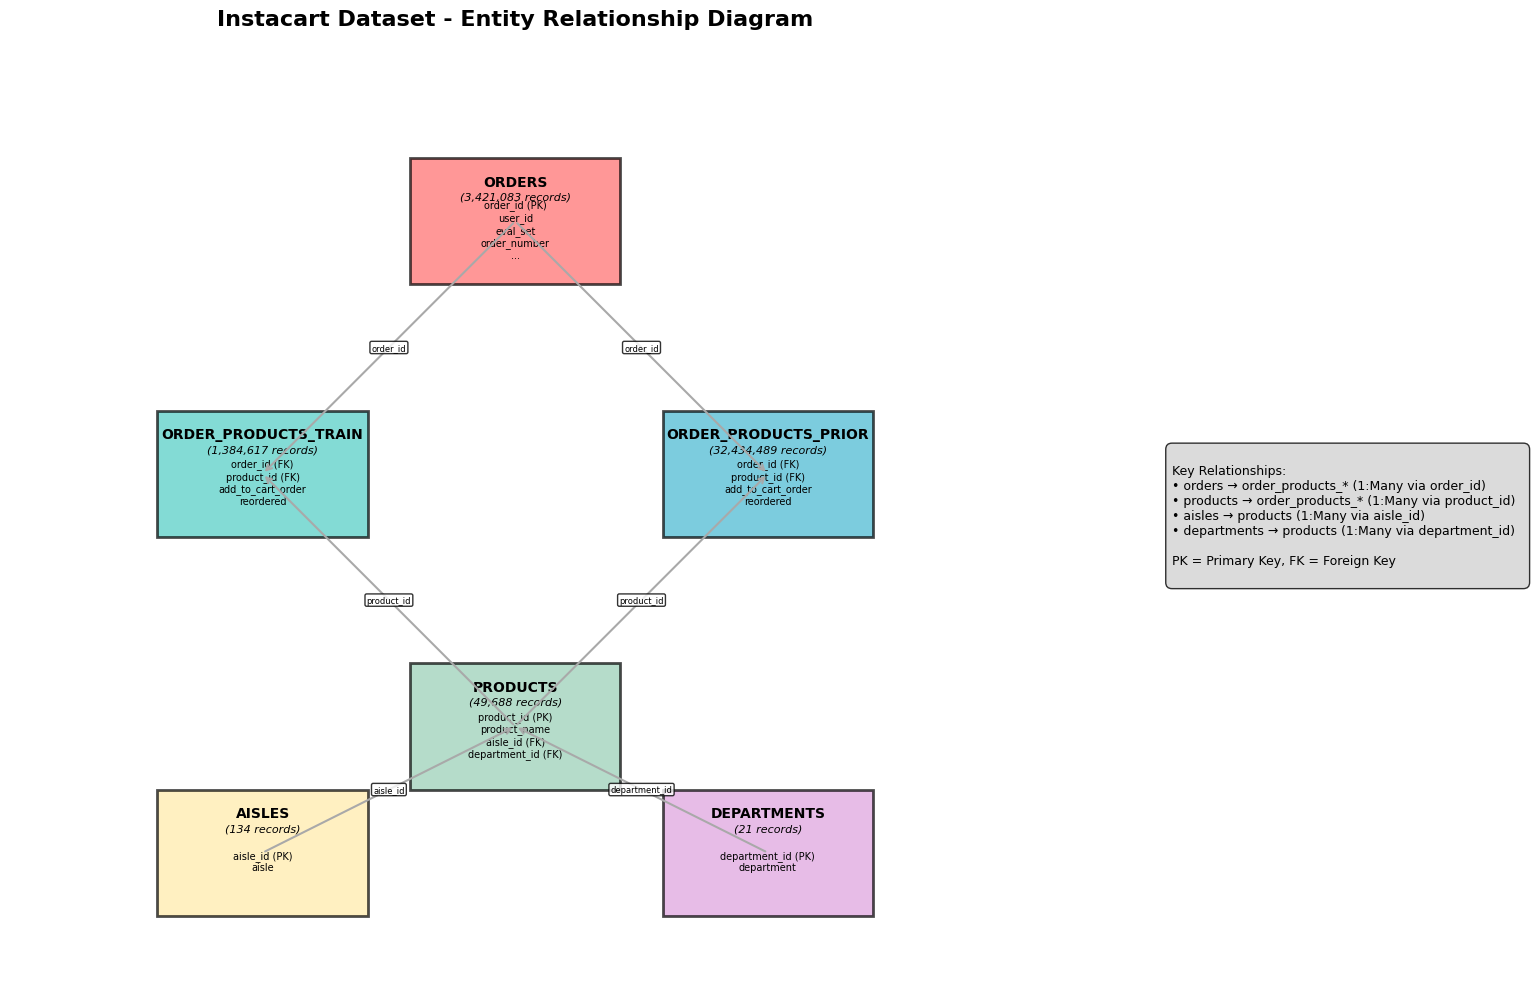

In [3]:
# Create Entity Relationship Diagram for Instacart Dataset
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Define positions for each table
positions = {
    'orders': (0.5, 0.8),
    'order_products_train': (0.2, 0.5),
    'order_products_prior': (0.8, 0.5),
    'products': (0.5, 0.2),
    'aisles': (0.2, 0.05),
    'departments': (0.8, 0.05)
}

# Define table information
table_info = {
    'orders': {
        'columns': ['order_id (PK)', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'],
        'color': '#FF6B6B',
        'records': f"{orders.shape[0]:,}"
    },
    'order_products_train': {
        'columns': ['order_id (FK)', 'product_id (FK)', 'add_to_cart_order', 'reordered'],
        'color': '#4ECDC4',
        'records': f"{order_products_train.shape[0]:,}"
    },
    'order_products_prior': {
        'columns': ['order_id (FK)', 'product_id (FK)', 'add_to_cart_order', 'reordered'],
        'color': '#45B7D1',
        'records': f"{order_products_prior.shape[0]:,}"
    },
    'products': {
        'columns': ['product_id (PK)', 'product_name', 'aisle_id (FK)', 'department_id (FK)'],
        'color': '#96CEB4',
        'records': f"{products.shape[0]:,}"
    },
    'aisles': {
        'columns': ['aisle_id (PK)', 'aisle'],
        'color': '#FFEAA7',
        'records': f"{aisles.shape[0]:,}"
    },
    'departments': {
        'columns': ['department_id (PK)', 'department'],
        'color': '#DDA0DD',
        'records': f"{departments.shape[0]:,}"
    }
}

# Draw tables
for table_name, pos in positions.items():
    x, y = pos
    info = table_info[table_name]
    
    # Create table box
    box_width = 0.25
    box_height = 0.15
    
    # Draw main table box
    rect = plt.Rectangle((x - box_width/2, y - box_height/2), box_width, box_height, 
                        facecolor=info['color'], edgecolor='black', linewidth=2, alpha=0.7)
    ax.add_patch(rect)
    
    # Add table name
    ax.text(x, y + box_height/2 - 0.02, table_name.upper(), 
            ha='center', va='top', fontweight='bold', fontsize=10)
    
    # Add record count
    ax.text(x, y + box_height/2 - 0.04, f"({info['records']} records)", 
            ha='center', va='top', fontsize=8, style='italic')
    
    # Add columns
    col_text = '\n'.join(info['columns'][:4])  # Show first 4 columns
    if len(info['columns']) > 4:
        col_text += '\n...'
    
    ax.text(x, y - 0.01, col_text, ha='center', va='center', fontsize=7)

# Draw relationships
relationships = [
    ('orders', 'order_products_train', 'order_id'),
    ('orders', 'order_products_prior', 'order_id'),
    ('products', 'order_products_train', 'product_id'),
    ('products', 'order_products_prior', 'product_id'),
    ('aisles', 'products', 'aisle_id'),
    ('departments', 'products', 'department_id')
]

for source, target, key in relationships:
    x1, y1 = positions[source]
    x2, y2 = positions[target]
    
    # Draw arrow
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='darkgray'))
    
    # Add relationship label
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    ax.text(mid_x, mid_y, key, ha='center', va='center', 
            bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8),
            fontsize=6)

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.0)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Instacart Dataset - Entity Relationship Diagram', fontsize=16, fontweight='bold', pad=20)

# Add legend
legend_text = """
Key Relationships:
• orders → order_products_* (1:Many via order_id)
• products → order_products_* (1:Many via product_id)  
• aisles → products (1:Many via aisle_id)
• departments → products (1:Many via department_id)

PK = Primary Key, FK = Foreign Key
"""

ax.text(1.15, 0.5, legend_text, transform=ax.transAxes, fontsize=9,
        bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.8),
        verticalalignment='center')

plt.tight_layout()
plt.show()